# 1. About the Context

## 1.1 Company Background
Real Canadian Superstore is a major Canadian supermarket chain owned by Loblaw Companies Limited, one of the largest food and pharmacy retailers in Canada.

**Industry Type**:
Real Canadian Superstore operates in the retail industry, specifically as a hypermarket chain that combines a full grocery store with general merchandise.

**Main Products and Services**:
Groceries: Fresh produce, meat, seafood, dairy products, frozen foods, bakery items.

**General Merchandise**: Home goods, electronics, clothing (notably under the Joe Fresh brand), personal care items.

**Private Labels**: Products under Loblaw’s brands like President’s Choice and No Name.

**Additional Services**: Pharmacy services, Photo lab services, In-store medical clinics, Gas stations (e.g., Mobil), Fitness centers (in some locations, e.g., GoodLife Fitness)

## 1.2. About the Problem
SuperStore is a global retail company with a large customer base. To celebrate Christmas and New Year, the Marketing department wants to launch campaigns to show appreciation to loyal customers who have supported the company over the years, as well as to engage potential customers who could become loyal clients.

The Marketing Director also proposed a plan to use the RFM model in Python to segment customers, and then launch marketing campaigns to thank customers for supporting the company over the past time. As well as exploit potential customers to become loyal customers.

Suggestions to the Marketing and Sales team with the company's retail model, which of the three indicators R, F, and M should be most interested in.

## 1.3. About the Audience
**Data Leader**: High level of data literacy.

**HR Manager**: Professional knowledge in business.

# 2. EDA

## 2.1. Import packages

In [1]:
! pip install pandas-profiling
! pip install ydata_profiling

import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.8.1
    Uninstalling visions-0.8.1:
      Successfully uninstalled visions-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

## 2.2. Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Project 3_Python/'

df = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name = 'ecommerce retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2.3. Data understanding

### Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


1. Missing values in Description and CustomerId columns
2. float64 of CustomerID data types should be convert into int

In [5]:
#fill null value of CustomerID with -1 and convert data type to int
df['CustomerID']= df['CustomerID'].fillna(-1).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,11476.725404
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,12352.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,14382.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16255.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,6778.330409


1. Quantity column has negative min value => need to know why this happened and fix it
2. UnitPrice column has negative min value => need to know why this happened and fix it
3. CustomerID has missing values

In [7]:
report= ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:03<00:00,  2.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1. Missing cells occupies 3.1% over the whole dataset(Description 0.3% and CustomerID 24.9%)
2. Duplicate row occupies 17.7%

### Check missing values

In [8]:
#find out missing values in CustomerID
missing_customerid= df[df['CustomerID']== -1]
missing_customerid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,-1,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,-1,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,-1,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,-1,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,-1,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,-1,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,-1,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,-1,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,-1,United Kingdom


**Possible reasons of missing value in CustomerID:**
* Cancelled transactions
* Guest checkouts (customers didn’t log in)
* Transactions were recorded without identifying the customer
* System failed to capture customer info

**Actions**: Drop rows since rows without CustomerID can't be tied to any individual when doing customer analysis like RFM segmentation.



In [9]:
# create a new column to check cancellations
df['IsCancelled'] = df['InvoiceNo'].astype(str).str.startswith('C')
cancelled_df = df[df['IsCancelled'] == True]
cancelled_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,True


In [10]:
#check how many cancellation orders
cancellation_count = df['InvoiceNo'].astype(str).str.startswith('C').sum()
print("Total cancellations:", cancellation_count)

Total cancellations: 9288


In [11]:
# check if any null customerID belonged to cancelled order
cancelled_customerid = df[(df['CustomerID']== -1) & (df['IsCancelled'] == True)]
cancelled_customerid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
11502,C537251,22429,ENAMEL MEASURING JUG CREAM,-2,2010-12-06 10:45:00,4.25,-1,United Kingdom,True
11503,C537251,22620,4 TRADITIONAL SPINNING TOPS,-8,2010-12-06 10:45:00,1.25,-1,United Kingdom,True
11504,C537251,21890,S/6 WOODEN SKITTLES IN COTTON BAG,-2,2010-12-06 10:45:00,2.95,-1,United Kingdom,True
11505,C537251,22564,ALPHABET STENCIL CRAFT,-5,2010-12-06 10:45:00,1.25,-1,United Kingdom,True
11506,C537251,21891,TRADITIONAL WOODEN SKIPPING ROPE,-3,2010-12-06 10:45:00,1.25,-1,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
492207,C578097,22112,CHOCOLATE HOT WATER BOTTLE,-48,2011-11-22 17:31:00,4.25,-1,United Kingdom,True
514984,C579757,47469,ASSORTED SHAPES PHOTO CLIP SILVER,-24,2011-11-30 14:56:00,0.65,-1,United Kingdom,True
516454,C579907,22169,FAMILY ALBUM WHITE PICTURE FRAME,-2,2011-12-01 08:48:00,7.65,-1,EIRE,True
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,-1,United Kingdom,True


**Comments:** 383 out of 135080 rows in CustomerID missing values are cancelled order.

In [12]:
#remove all the cancellation including invoice no start with 'C' and its origional purchase
#get original invoice numbers from cancelled ones
cancelled_invoices = df[df['IsCancelled']]['InvoiceNo'].str[1:]

#create a list of all invoices to remove (cancelled + original)
all_to_remove = pd.concat([
    cancelled_invoices,
    'C' + cancelled_invoices
])

#remove those invoices
df= df[~df['InvoiceNo'].astype(str).isin(all_to_remove)].reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
532616,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False
532617,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False
532618,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False
532619,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False


In [13]:
# find out missing values in Description
missing_description= df[df['Description'].isna()]
missing_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
613,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,-1,United Kingdom,False
1958,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,-1,United Kingdom,False
1959,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,-1,United Kingdom,False
1960,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,-1,United Kingdom,False
1961,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,-1,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
526108,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,-1,United Kingdom,False
526112,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,-1,United Kingdom,False
526118,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,-1,United Kingdom,False
527751,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,-1,United Kingdom,False


**Possible reasons of missing value in CustomerID:**

* **Data Entry or System Error:** The product was sold but the item description wasn’t recorded properly in the system.
* **Invalid or Canceled Transactions:** Many of the rows with NaN descriptions have: Quantity <= 0 or/and UnitPrice = 0.0 or/and missing CustomerID. These can happen because of: Refunds, test entries or voided sales

**Actions:** Drop rows

### Handle missing values

In [14]:
df = df[df['CustomerID'] != -1]

In [15]:
df= df[~df['Description'].isna()]

### Check duplicate values

In [16]:
#check duplicate value in customerid
duplicate_customerid = df[df.duplicated(subset=['CustomerID'], keep=False)]
duplicate_customerid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
532616,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False
532617,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False
532618,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False
532619,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False


The ProfileReport above also shows that the distinct value in CustomerID is 4372 so that duplicate CustomerID values are completely normal in this dataset. They indicate that a single customer has made multiple purchases, which is expected behavior in retail.

**Actions**: keep this to explore more about M value in RFM model

In [17]:
#check duplicate value in InvoiceNo
duplicate_invoice = df[df.duplicated(subset=['InvoiceNo'], keep=False)]
duplicate_invoice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
532616,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False
532617,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False
532618,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False
532619,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False


Each InvoiceNo represents one order, but each product in that order is listed as a separate row. Therefore, it is completely normal for duplicated value in InvoiceNo.

**Actions**: keep this and we can group by InvoiceNo to find out the subtotal for each InvoiceNo (order)

# 3. Data Processing

## 3.1. RFM segmentation

### Invoice summary table

In [18]:
# calculate total for each line item
df['TotalOrder'] = df['Quantity'] * df['UnitPrice']

# group by InvoiceNo to get detail informations per invoice
invoice_summary = df.groupby('InvoiceNo').agg({
    'Quantity': 'sum',
    'TotalOrder': 'sum',
    'InvoiceDate': 'first',
    'CustomerID': 'first',
    'Country': 'first'
}).reset_index()

invoice_summary

,InvoiceNo,Quantity,TotalOrder,InvoiceDate,CustomerID,Country
0,536365,40,139.12,2010-12-01 08:26:00,17850,United Kingdom
1,536366,12,22.20,2010-12-01 08:28:00,17850,United Kingdom
2,536367,83,278.73,2010-12-01 08:34:00,13047,United Kingdom
3,536368,15,70.05,2010-12-01 08:34:00,13047,United Kingdom
4,536369,3,17.85,2010-12-01 08:35:00,13047,United Kingdom
...,...,...,...,...,...,...
18531,581583,76,124.60,2011-12-09 12:23:00,13777,United Kingdom
18532,581584,120,140.64,2011-12-09 12:25:00,13777,United Kingdom
18533,581585,278,329.05,2011-12-09 12:31:00,15804,United Kingdom
18534,581586,66,339.20,2011-12-09 12:49:00,13113,United Kingdom


Comments: Now, from this table, we can calculate based on RFM segmentation:
- **Recency**: Time since last order
- **Frequency**: Total number of transaction the customer have made and the average time between each transaction
- **Monetary**: Cummulative summary and average transaction values

### RFM

In [20]:
#set the last date for recency
import datetime
last_date = datetime.datetime(2011, 12, 31)

#rfm variables
rfm= invoice_summary.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date-x.max()).days,
    'InvoiceNo': 'count',
    'TotalOrder': 'mean',
    'Country': 'first'
}).reset_index()

#rename the table
rfm.columns=['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Country']
rfm

,CustomerID,Recency,Frequency,Monetary,Country
0,12346,346,1,77183.600000,United Kingdom
1,12347,23,7,615.714286,Iceland
2,12348,96,4,449.310000,Finland
3,12349,39,1,1757.550000,Italy
4,12350,331,1,334.400000,Norway
...,...,...,...,...,...
4334,18280,298,1,180.600000,United Kingdom
4335,18281,201,1,80.820000,United Kingdom
4336,18282,28,2,89.025000,United Kingdom
4337,18283,24,16,130.930000,United Kingdom


In [21]:
#RFM scoring
#R Score: lower recency = higher score
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

#F Score: higher frequency = higher score
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

#M Score: higher monetary = higher score
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

#RFM Score
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm

,CustomerID,Recency,Frequency,Monetary,Country,R,F,M,RFM
0,12346,346,1,77183.600000,United Kingdom,1,1,5,115
1,12347,23,7,615.714286,Iceland,5,5,5,555
2,12348,96,4,449.310000,Finland,2,4,4,244
3,12349,39,1,1757.550000,Italy,4,1,5,415
4,12350,331,1,334.400000,Norway,1,1,3,113
...,...,...,...,...,...,...,...,...,...
4334,18280,298,1,180.600000,United Kingdom,1,2,2,122
4335,18281,201,1,80.820000,United Kingdom,1,2,1,121
4336,18282,28,2,89.025000,United Kingdom,5,3,1,531
4337,18283,24,16,130.930000,United Kingdom,5,5,1,551


In [22]:
#read segmentation sheet
segmentation = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='Segmentation')

#split the value by comma
segmentation['RFM Score'] = segmentation['RFM Score'].astype(str).str.split(',')
segmentation = segmentation.explode('RFM Score').reset_index(drop=True)
segmentation['RFM Score'] = segmentation['RFM Score'].str.strip()
segmentation

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [23]:
#map rfm and segmentation
rfm = rfm.merge(segmentation, how='left', left_on='RFM', right_on='RFM Score')

In [24]:
rfm

,CustomerID,Recency,Frequency,Monetary,Country,R,F,M,RFM,Segment,RFM Score
0,12346,346,1,77183.600000,United Kingdom,1,1,5,115,Cannot Lose Them,115
1,12347,23,7,615.714286,Iceland,5,5,5,555,Champions,555
2,12348,96,4,449.310000,Finland,2,4,4,244,At Risk,244
3,12349,39,1,1757.550000,Italy,4,1,5,415,Promising,415
4,12350,331,1,334.400000,Norway,1,1,3,113,Cannot Lose Them,113
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280,298,1,180.600000,United Kingdom,1,2,2,122,Hibernating customers,122
4335,18281,201,1,80.820000,United Kingdom,1,2,1,121,Lost customers,121
4336,18282,28,2,89.025000,United Kingdom,5,3,1,531,Potential Loyalist,531
4337,18283,24,16,130.930000,United Kingdom,5,5,1,551,Potential Loyalist,551


In [25]:
#check if any missing data in segment
rfm[rfm['Segment']=='NaN']

,CustomerID,Recency,Frequency,Monetary,Country,R,F,M,RFM,Segment,RFM Score


**All the RFM Score is mapped**

###Loyal customer vs Non-loyal customer

#### 1. Loyal Customer

In [26]:
loyal_customer= rfm[rfm['Segment'].isin(['Champions', 'Loyal'])]
loyal_count = loyal_customer.shape[0]
loyal_count

777

There's 777 loyal customers (in Champions and Loyal segment) out of 4339 total customers

In [27]:
loyal_percent = (loyal_count / rfm['CustomerID'].nunique()) * 100
loyal_percent

17.907351924406544

**About 17.9% customer of SuperStore is loyal customers**. In the future, we can set the target for campaigns or activities to foster this figure

Next we will convey their shopping behaviours.

In [28]:
#take all shopping info of loyal customer from invoice summary table
loyal_orders = invoice_summary[invoice_summary['CustomerID'].isin(loyal_customer['CustomerID'])]
loyal_orders

,InvoiceNo,Quantity,TotalOrder,InvoiceDate,CustomerID,Country
5,536370,449,855.86,2010-12-01 08:45:00,12583,France
14,536380,24,34.80,2010-12-01 09:41:00,17809,United Kingdom
15,536381,198,449.98,2010-12-01 09:41:00,15311,United Kingdom
19,536386,236,508.20,2010-12-01 09:57:00,16029,United Kingdom
20,536387,1440,3193.92,2010-12-01 09:58:00,16029,United Kingdom
...,...,...,...,...,...,...
18529,581581,22,51.18,2011-12-09 12:20:00,17581,United Kingdom
18530,581582,18,29.88,2011-12-09 12:21:00,17581,United Kingdom
18531,581583,76,124.60,2011-12-09 12:23:00,13777,United Kingdom
18532,581584,120,140.64,2011-12-09 12:25:00,13777,United Kingdom


In [29]:
#sort loyal orders by time
loyal_orders = loyal_orders.sort_values(by=['CustomerID', 'InvoiceDate'])

#calculate average value order
loyal_avg_order= loyal_orders.groupby('CustomerID')['TotalOrder'].mean().reset_index()
loyal_avg_order

,CustomerID,TotalOrder
0,12347,615.714286
1,12356,937.143333
2,12359,1593.145000
3,12360,887.353333
4,12362,522.623000
...,...,...
772,18245,366.722857
773,18259,779.533333
774,18263,404.386667
775,18272,513.096667


In [30]:
#first order information
loyal_first_orders = loyal_orders.groupby('CustomerID').first().reset_index()
loyal_first_orders

,CustomerID,InvoiceNo,Quantity,TotalOrder,InvoiceDate,Country
0,12347,537626,319,711.79,2010-12-07 14:57:00,Iceland
1,12356,541430,1216,2271.62,2011-01-18 09:50:00,Portugal
2,12359,540946,144,547.50,2011-01-12 12:43:00,Cyprus
3,12360,554132,434,1083.58,2011-05-23 09:43:00,Austria
4,12362,544203,229,479.10,2011-02-17 10:30:00,Belgium
...,...,...,...,...,...,...
772,18245,539477,297,365.73,2010-12-19 14:58:00,United Kingdom
773,18259,537813,116,376.30,2010-12-08 13:38:00,United Kingdom
774,18263,548616,328,307.60,2011-04-01 11:48:00,United Kingdom
775,18272,549185,512,639.82,2011-04-07 09:35:00,United Kingdom


In [31]:
#find the information about second order and disparity time between first and second time
loyal_orders['OrderRank'] = loyal_orders.groupby('CustomerID').cumcount()

# Second order
loyal_second_orders = loyal_orders[loyal_orders['OrderRank'] == 1][['CustomerID', 'InvoiceDate']]
loyal_second_orders = loyal_second_orders.rename(columns={'InvoiceDate': 'SecondInvoiceDate'})

#merge and calculate days between
loyal_order_dates = pd.merge(loyal_first_orders, loyal_second_orders, on='CustomerID', how='inner')
loyal_order_dates['DaysBetweenOrders'] = (loyal_order_dates['SecondInvoiceDate'] - loyal_order_dates['InvoiceDate']).dt.days
loyal_order_dates

,CustomerID,InvoiceNo,Quantity,TotalOrder,InvoiceDate,Country,SecondInvoiceDate,DaysBetweenOrders
0,12347,537626,319,711.79,2010-12-07 14:57:00,Iceland,2011-01-26 14:30:00,49
1,12356,541430,1216,2271.62,2011-01-18 09:50:00,Portugal,2011-04-08 12:33:00,80
2,12359,540946,144,547.50,2011-01-12 12:43:00,Cyprus,2011-02-07 14:51:00,26
3,12360,554132,434,1083.58,2011-05-23 09:43:00,Austria,2011-08-19 10:10:00,88
4,12362,544203,229,479.10,2011-02-17 10:30:00,Belgium,2011-04-28 09:12:00,69
...,...,...,...,...,...,...,...,...
772,18245,539477,297,365.73,2010-12-19 14:58:00,United Kingdom,2011-01-31 11:46:00,42
773,18259,537813,116,376.30,2010-12-08 13:38:00,United Kingdom,2011-09-15 14:37:00,281
774,18263,548616,328,307.60,2011-04-01 11:48:00,United Kingdom,2011-07-07 10:04:00,96
775,18272,549185,512,639.82,2011-04-07 09:35:00,United Kingdom,2011-04-28 18:11:00,21


#### 2. Potential Customer

In [32]:
potential_customer= rfm[rfm['Segment']=='Potential Loyalist']

In [33]:
#count potential customers
potential_count = potential_customer.shape[0]
potential_count

925

In [34]:
#percentage of potential customers
potential_percent = (potential_count / rfm['CustomerID'].nunique()) * 100
potential_percent

21.31827610048398

**21.3% customer of SuperStore is potential customers**

Next we will convey their shopping behaviours.

In [35]:
#take all shopping info of potential customer from invoice summary table
potential_orders = invoice_summary[invoice_summary['CustomerID'].isin(potential_customer['CustomerID'])]
potential_orders

,InvoiceNo,Quantity,TotalOrder,InvoiceDate,CustomerID,Country
2,536367,83,278.73,2010-12-01 08:34:00,13047,United Kingdom
3,536368,15,70.05,2010-12-01 08:34:00,13047,United Kingdom
4,536369,3,17.85,2010-12-01 08:35:00,13047,United Kingdom
11,536376,112,328.80,2010-12-01 09:32:00,15291,United Kingdom
13,536378,454,444.98,2010-12-01 09:37:00,14688,United Kingdom
...,...,...,...,...,...,...
18516,581502,158,133.35,2011-12-09 10:51:00,15910,United Kingdom
18521,581567,365,389.21,2011-12-09 11:56:00,16626,United Kingdom
18528,581580,82,94.11,2011-12-09 12:20:00,12748,United Kingdom
18533,581585,278,329.05,2011-12-09 12:31:00,15804,United Kingdom


In [36]:
#calculate average value order
potential_avg_order= potential_orders.groupby('CustomerID')['TotalOrder'].mean().reset_index()
potential_avg_order

,CustomerID,TotalOrder
0,12352,313.25500
1,12384,292.63500
2,12395,251.55250
3,12413,252.70000
4,12421,201.76000
...,...,...
920,18257,292.20375
921,18273,68.00000
922,18276,335.86000
923,18282,89.02500


In [37]:
#sort potential orders by time
potential_orders = potential_orders.sort_values(by=['CustomerID', 'InvoiceDate'])

#first order information
potential_first_orders = potential_orders.groupby('CustomerID').first().reset_index()
potential_first_orders

,CustomerID,InvoiceNo,Quantity,TotalOrder,InvoiceDate,Country
0,12352,544156,98,296.50,2011-02-16 12:33:00,Norway
1,12384,562882,62,292.69,2011-08-10 11:23:00,Switzerland
2,12395,537026,528,346.10,2010-12-03 16:35:00,Belgium
3,12413,540365,180,479.25,2011-01-06 16:12:00,France
4,12421,541980,104,157.45,2011-01-24 15:09:00,Spain
...,...,...,...,...,...,...
920,18257,544182,112,328.40,2011-02-16 15:13:00,United Kingdom
921,18273,547843,20,51.00,2011-03-27 11:22:00,United Kingdom
922,18276,572990,186,335.86,2011-10-27 10:54:00,United Kingdom
923,18282,562525,75,100.21,2011-08-05 13:35:00,United Kingdom


In [38]:
#find the information about second order and disparity time between first and second time
potential_orders['OrderRank'] = potential_orders.groupby('CustomerID').cumcount()

# Second order
potential_second_orders = potential_orders[potential_orders['OrderRank'] == 1][['CustomerID', 'InvoiceDate']]
potential_second_orders = potential_second_orders.rename(columns={'InvoiceDate': 'SecondInvoiceDate'})

#merge and calculate days between
potential_order_dates = pd.merge(potential_first_orders, potential_second_orders, on='CustomerID', how='inner')
potential_order_dates['DaysBetweenOrders'] = (potential_order_dates['SecondInvoiceDate'] - potential_order_dates['InvoiceDate']).dt.days
potential_order_dates

,CustomerID,InvoiceNo,Quantity,TotalOrder,InvoiceDate,Country,SecondInvoiceDate,DaysBetweenOrders
0,12352,544156,98,296.50,2011-02-16 12:33:00,Norway,2011-03-01 14:57:00,13
1,12384,562882,62,292.69,2011-08-10 11:23:00,Switzerland,2011-11-11 08:39:00,92
2,12395,537026,528,346.10,2010-12-03 16:35:00,Belgium,2010-12-17 16:00:00,13
3,12413,540365,180,479.25,2011-01-06 16:12:00,France,2011-04-17 15:33:00,100
4,12421,541980,104,157.45,2011-01-24 15:09:00,Spain,2011-06-19 13:54:00,145
...,...,...,...,...,...,...,...,...
882,18252,557601,18,69.90,2011-06-21 11:47:00,United Kingdom,2011-10-20 12:43:00,121
883,18257,544182,112,328.40,2011-02-16 15:13:00,United Kingdom,2011-02-22 11:05:00,5
884,18273,547843,20,51.00,2011-03-27 11:22:00,United Kingdom,2011-09-05 11:27:00,162
885,18282,562525,75,100.21,2011-08-05 13:35:00,United Kingdom,2011-12-02 11:43:00,118


# Visualization

In [39]:
df_bar = rfm.groupby('Segment')['CustomerID'].nunique().reset_index()
df_bar = df_bar.rename(columns={'CustomerID': 'Count'})
df_bar = df_bar.sort_values(by='Count', ascending=False)
df_bar

,Segment,Count
9,Potential Loyalist,925
1,At Risk,524
4,Hibernating customers,478
3,Champions,462
5,Lost customers,351
6,Loyal,315
7,Need Attention,301
2,Cannot Lose Them,288
0,About To Sleep,271
10,Promising,268


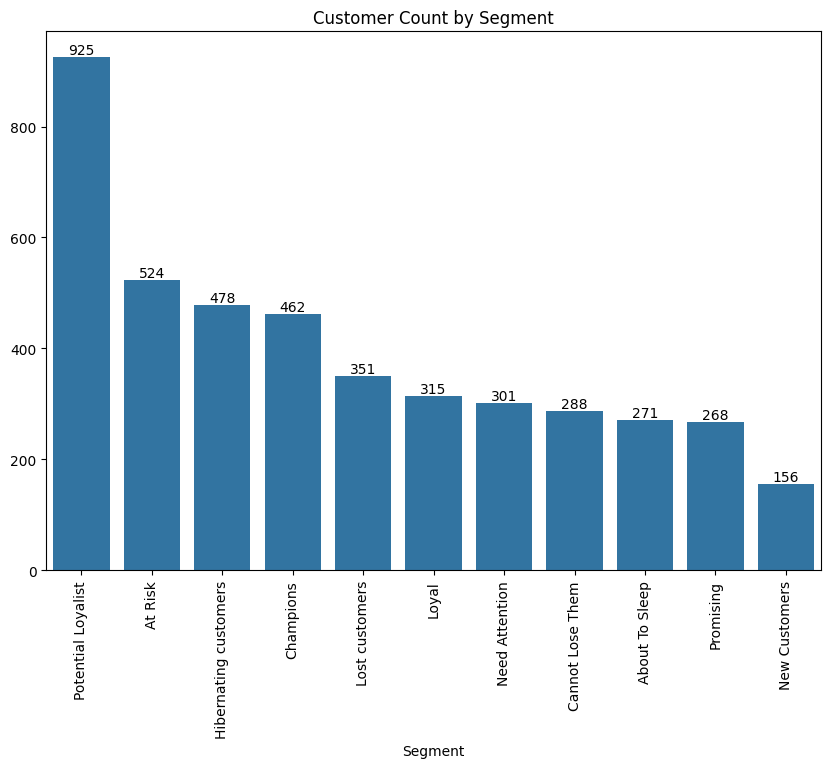

In [40]:
#customer count by segment
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=df_bar, x='Segment', y='Count')
ax.set_ylabel('')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Customer Count by Segment')
plt.show()

**Comments:**
- Potential Loyalists make up the largest customer group. These are customers who have purchased recently and frequently buy.
=> Recommend: marketing campaigns, such as personalized promotions or loyalty incentives, to encourage repeat purchases with higher average transaction value them into Loyal or Champion customers.

- Champions and Loyal segments already represent engaged and high-value customers.
=> Recommend: Launching appreciation campaigns (e.g. exclusive offers, thank-you emails) will help strengthen relationships and retain them long term.

- At Risk customers are the second largest group.
=> Recommend: Reactivation campaigns (e.g. win-back discounts or reminders) can prevent them from dropping into Lost.

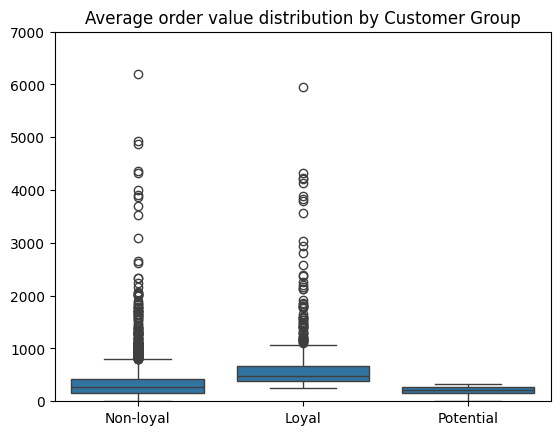

In [41]:
#Average order value distribution by Customer Group
rfm['CustomerGroup'] = rfm['Segment'].apply(
    lambda x: 'Loyal' if x in ['Loyal', 'Champions']
    else ('Potential' if x == 'Potential Loyalist'
          else 'Non-loyal')
)

sns.boxplot(data=rfm, x='CustomerGroup', y='Monetary')
plt.ylim(0, 7000)
plt.title('Average order value distribution by Customer Group')
plt.ylabel('')
plt.xlabel('')
plt.show()


Comments:

**Loyal customers:**
* Highest median
* Wider IQR => more variation in how much they spend
* Extreme outliers — some customers spend significantly more

**Potential Loyalists:**
* Lowest median and smaller spread
* Narrow box => low consistency in spending

**Non-loyal customers:**
* Lower median than Loyal
* Moderate variability, but some spend a decent amount

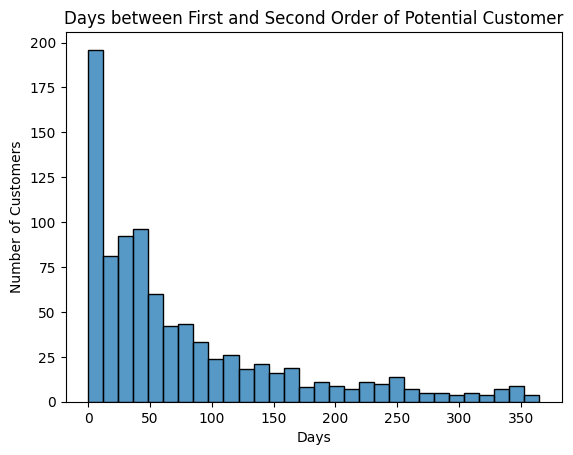

In [42]:
#Days Between First and Second Order of Potential Customer
sns.histplot(data=potential_order_dates, x='DaysBetweenOrders', bins=30)
plt.title('Days between First and Second Order of Potential Customer')
plt.xlabel('Days')
plt.ylabel('Number of Customers')
plt.show()

- The majority of potential customers placed their second order within the first 30 days after the first one => strong early engagement.

- After 50 days, there is a sharp drop in follow-up orders, with frequency continuing to decline steadily over time.

- A long tail exists where some customers take more than 6 months to make their second purchase.

**Actions:** Target potential loyal customers with follow-up campaigns or promotions within the first 30 days and some vouchers to increase the chances of converting them into loyal buyers.

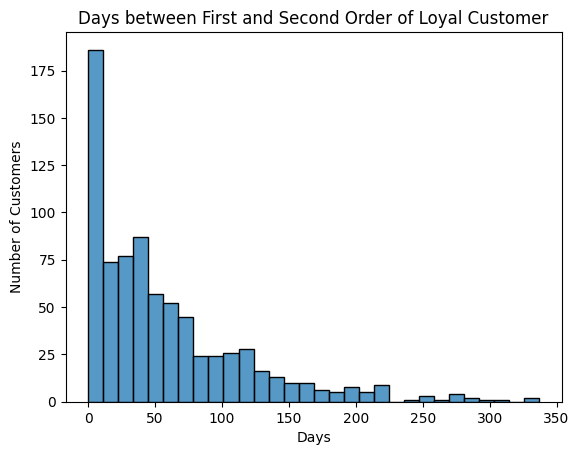

In [43]:
#Days Between First and Second Order of Loyal Customer
sns.histplot(data= loyal_order_dates, x='DaysBetweenOrders', bins=30)
plt.title('Days between First and Second Order of Loyal Customer')
plt.xlabel('Days')
plt.ylabel('Number of Customers')
plt.show()

- Loyal customers also tend to make their second purchase very quickly, with most of them doing so within 30 days.

- Only a small portion delayed their second order beyond 150 days, which suggests these are less consistent or slower repeaters.

**Actions:** Launching thank-you campaigns, early-access deals, or loyalty points programs right after the first order.

In [57]:
#find out how many loyal, non-loyal and potential customers in each country
country_dis = rfm.groupby(['Country', 'CustomerGroup']).size().reset_index(name='CustomerCount').sort_values(by='CustomerCount', ascending=False)
country_dis

,Country,CustomerGroup,CustomerCount
66,United Kingdom,Non-loyal,2366
67,United Kingdom,Potential,881
65,United Kingdom,Loyal,674
27,Germany,Non-loyal,53
24,France,Non-loyal,48
...,...,...,...
47,Poland,Loyal,1
40,Malta,Non-loyal,1
53,Singapore,Loyal,1
57,Sweden,Loyal,1


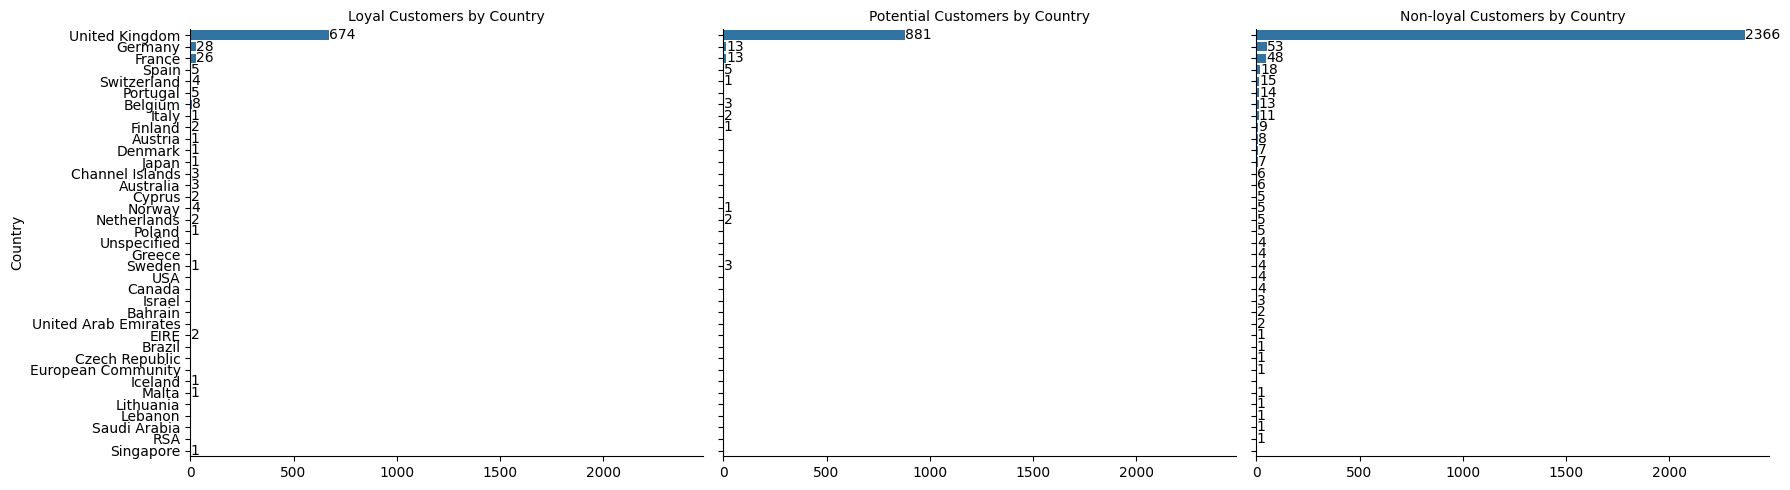

In [64]:
#create the FacetGrid
g = sns.FacetGrid(data=country_dis,
                  col='CustomerGroup',
                  col_order=['Loyal', 'Potential', 'Non-loyal'],
                  sharey=True,
                  height=5, aspect=1.2)

#create barplots in each facet
g.map_dataframe(sns.barplot, x='CustomerCount', y='Country', order=country_dis['Country'].unique())

#set titles and labels
g.set_titles('{col_name} Customers by Country')
g.set_axis_labels('Customer Count', 'Country')
g.set(xlabel='')

#iterate through the axes and add bar labels
for axes in g.axes.flat:
    axes.bar_label(axes.containers[0], fontsize=10)

plt.tight_layout()
plt.show()

As we can see, UK has much more larger number of customers in each categories, compared to other country. Therefore, it's hard to evaluate.

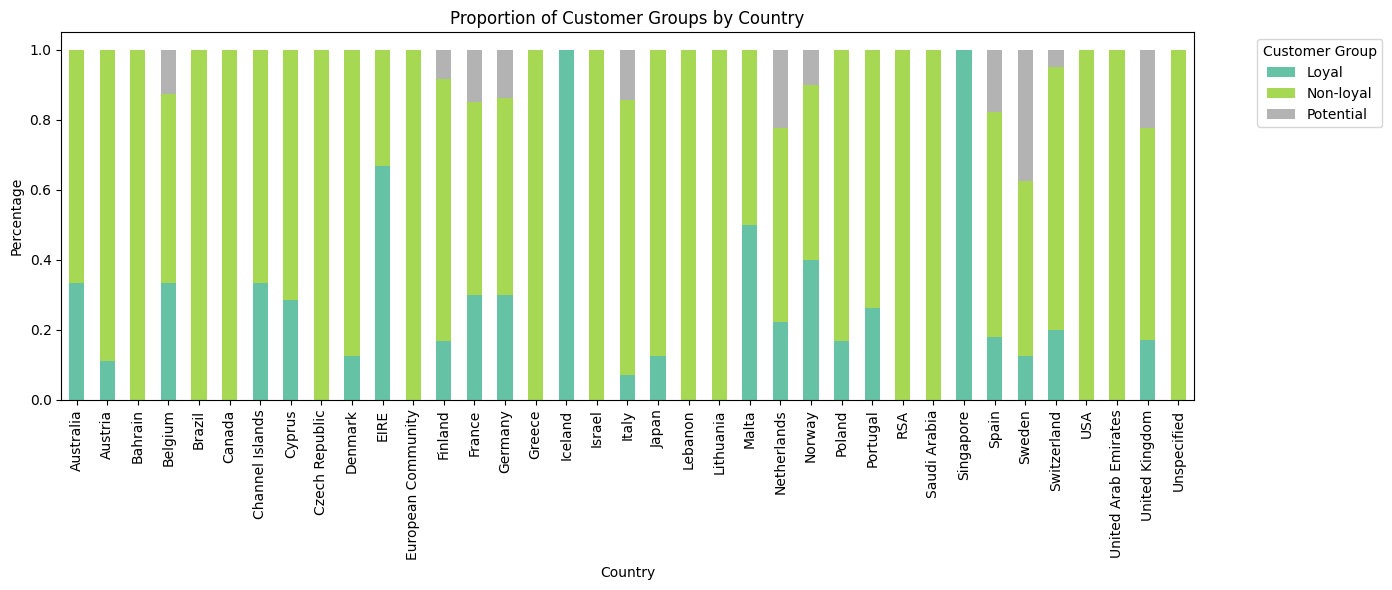

In [67]:
#use stacked column chart to normalize
pivot_data = country_dis.pivot(index='Country', columns='CustomerGroup', values='CustomerCount').fillna(0)

pivot_pct = pivot_data.div(pivot_data.sum(axis=1), axis=0)

pivot_pct.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Set2')
plt.title('Proportion of Customer Groups by Country')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Customer Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Comments:**

Loyal Customers:
* 100% in Iceland, Singapore
* High in EIRE, Marta, Norway

Non-loyal:
* 100% in Brazil, Czech, Greece, Isarel
* High in Austria, Denmark, Italy, Japan

Potential:
* High in Sweden, UK, Spain, Netherlands

**Actions:** Conduct proper campaigns in each country to target suitable type of consumers